# Haberman's Survival: Exploratory Data Analysis

Data Description The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.







# Attribute Information:
Age of patient at the time of operation (numerical)

Patient’s year of operation (year — 1900, numerical)

Number of positive axillary nodes detected (numerical)

Survival status (class attribute) :

1 = the patient survived 5 years or longer

2 = the patient died within 5 years


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:

#reading the csv file
haberman_dataset= pd.read_csv(r'/home/user/Downloads/haberman.csv')

In [4]:
##Prints the first 5 entries from the csv file
haberman_dataset.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
#shape of the dataset
haberman_dataset.shape

(306, 4)

In [6]:
#priniting the columns
haberman_dataset.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [7]:
#brief info of the dataset
haberman_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [8]:
#haberman_dataset['status'] = ['True' if var == 1 else 'False' for var in haberman_dataset['status']]

for index, var1 in enumerate(haberman_dataset['status']):
    if var1 == 1 :
        haberman_dataset.loc[index,'status']= True
    else:
        haberman_dataset.loc[index,'status']= False
        

observation:

1.There is no missing data in this dataset.

2.All the columns are of integer data type.

3.The datatype of the status is an integer, it has to be converted to a categorical datatype


In [9]:
haberman_dataset.describe()
#describes the dataset

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [10]:
haberman_dataset['status'].value_counts()
#gives each count of the status type

True     225
False     81
Name: status, dtype: int64

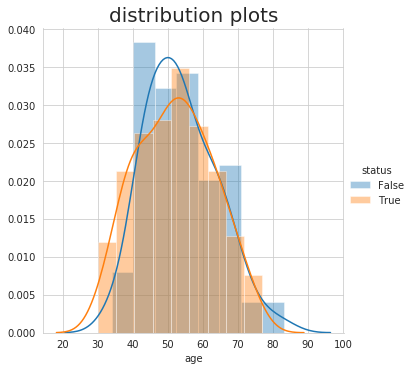

In [48]:
sns.FacetGrid(haberman_dataset,hue="status",height = 5)\
   .map(sns.distplot,"age")\
   .add_legend()
plt.title("distribution plots",fontsize=20)
plt.show()
   



###### observations:
1.Major overlapping is observed, which tells us that survival chances are irrespective of a person’s age.

2.Although there is overlapping we can vaguely tell that people whose age is in the range 30–40 are more likely to survive, and 40–60 are less likely to survive. While people whose age is in the range 60–75 have equal chances of surviving and not surviving

3.Yet, this cannot be our final conclusion.

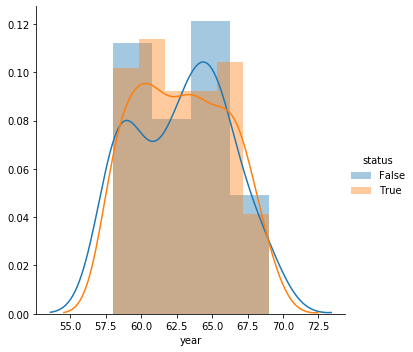

In [12]:
sns.FacetGrid(haberman_dataset,hue="status",height = 5)\
 .map(sns.distplot,"year")\
 .add_legend();
plt.show()

###### observations:
1.There is major overlapping observed. 

2.This graph only tells how many of the operations were successful and how many weren’t. This cannot be a parameter to decide the patient’s survival chances.

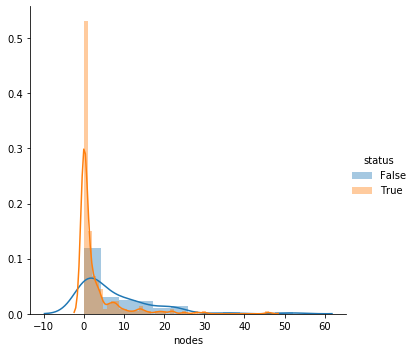

In [13]:
sns.FacetGrid(haberman_dataset,hue="status",height = 5)\
 .map(sns.distplot,"nodes")\
 .add_legend()
plt.show()


###### observations
1.Patients with no nodes or 1 node are more likely to survive. There are very few chances of surviving if there are 25 or more nodes.


###### Bi-variant analysis

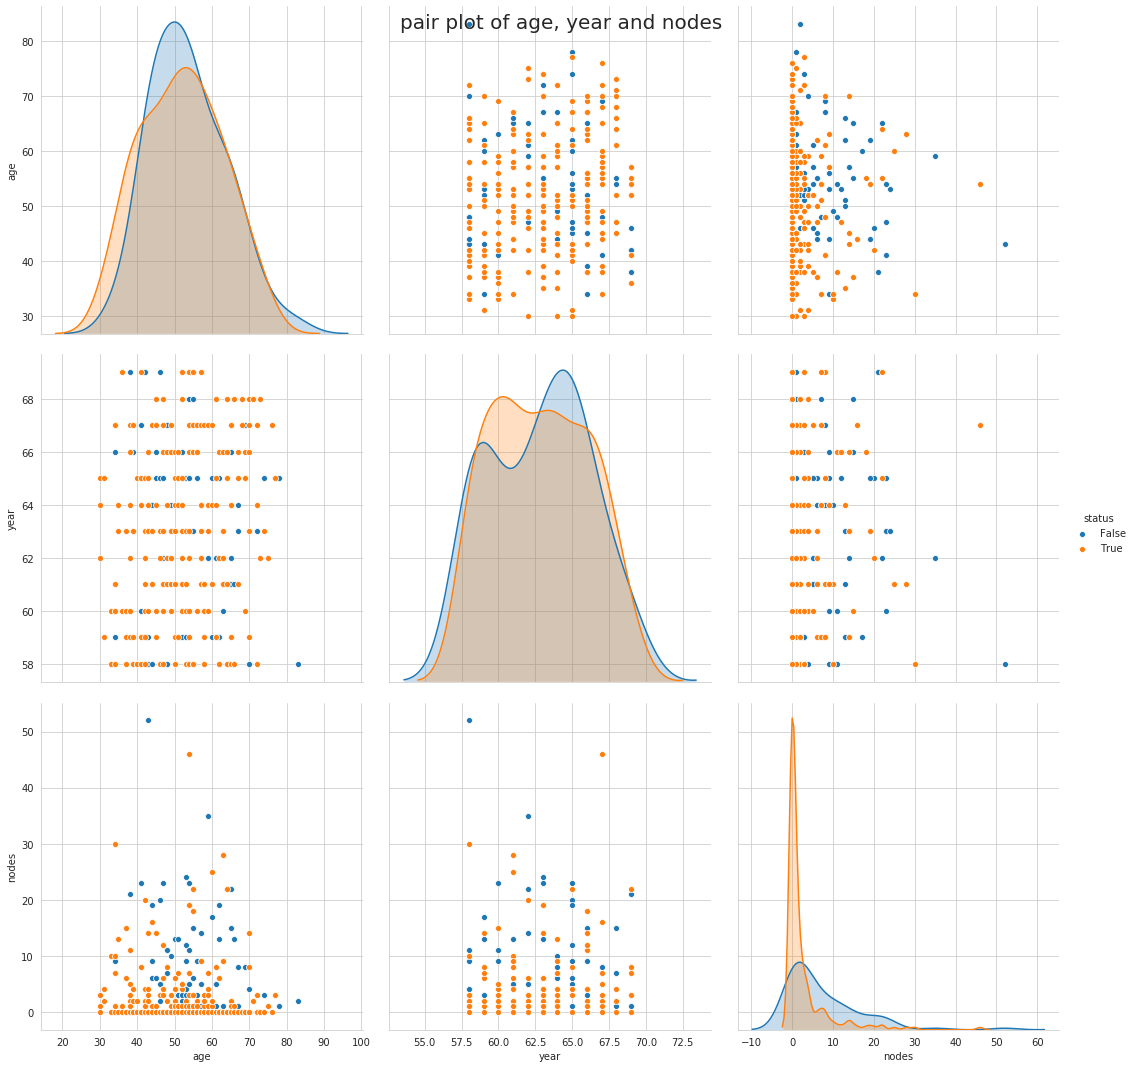

In [31]:
sns.set_style("whitegrid")
sns.pairplot(haberman_dataset, hue="status",vars=["age","year","nodes"],height = 5)
plt.suptitle("pair plot of age, year and nodes",fontsize=20)
plt.show()


###### observation:
plot between year and nodes is comparitvely better.

#### multivariant analysis

##### contour plot

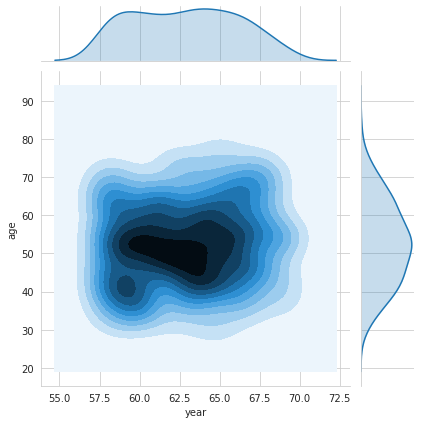

In [43]:
sns.jointplot(x = 'year', y = 'age', data = haberman_dataset, kind = "kde")              
plt.show()

#### Observation:

From 1960 to 1964, more operations done on the patients in the age group 45 to 55.

#### scatter plot

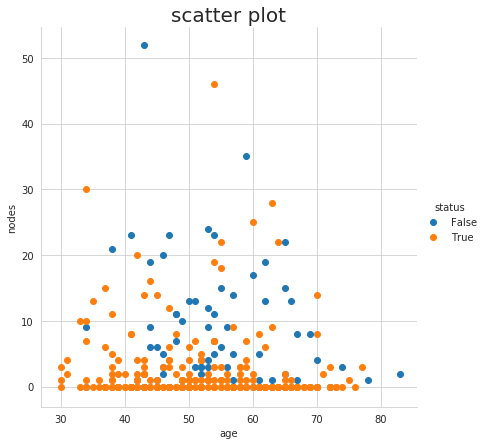

In [49]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman_dataset, hue = "status" , height = 6)\
 .map(plt.scatter,"age","nodes")\
 .add_legend()

plt.title('scatter plot',fontsize=20)
plt.show()

#### Cumulative Distribution Function(CDF)

In [17]:
status_yes = haberman_dataset[haberman_dataset['status']==1]
status_yes.describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [18]:
status_no=haberman_dataset[haberman_dataset['status']==0]
status_no.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
***********************************************************
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


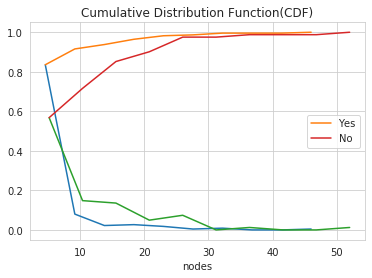

In [32]:
counts1, bin_edges1 = np.histogram(status_yes['nodes'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
print(pdf1);
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'Yes')
plt.xlabel('nodes')
print("***********************************************************")
counts2, bin_edges2 = np.histogram(status_no['nodes'], bins=10, density = True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'No')
plt.xlabel('nodes')
plt.title('Cumulative Distribution Function(CDF)')
plt.legend()
plt.show()

#### observation

83.55% of the patients who have survived had nodes in the range of 0–4.6

#### box plots and violin plot

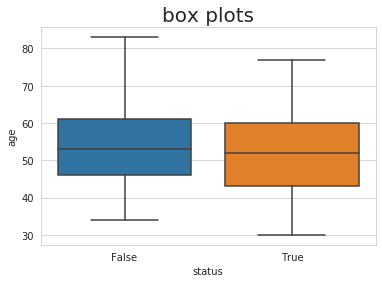

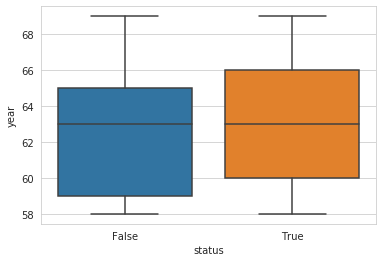

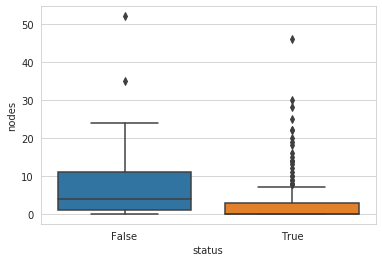

In [44]:
sns.boxplot(x='status',y='age',data=haberman_dataset)
plt.title('box plots',fontsize=20)
plt.show()
sns.boxplot(x='status',y='year',data=haberman_dataset)
plt.show()
sns.boxplot(x='status',y='nodes',data=haberman_dataset)
plt.show()

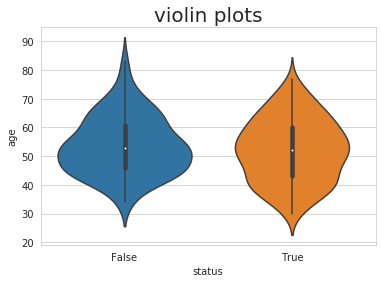

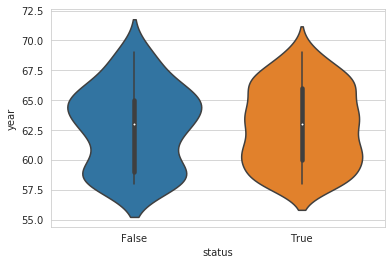

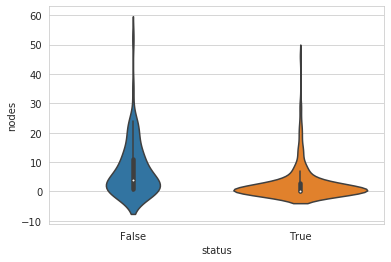

In [46]:
sns.violinplot(x="status",y="age",data = haberman_dataset,height = 10)
plt.title("violin plots",fontsize=20)
plt.show()
sns.violinplot(x="status",y="year",data = haberman_dataset,height = 10)
plt.show()
sns.violinplot(x="status",y="nodes",data = haberman_dataset,height = 10)
plt.show()


## conclusion

1.considering the data given ,out of the three features i.e (‘age’,’year’and ‘nodes’) 'nodes’ is the best and most important feature among three to classify the survival(Status)(target_variable).

2.Patients with more than 1 nodes are not likely to survive. More the number of nodes, lesser the survival chances.

3.operation has been performed on diverse age groups ranging from 30 to age 83.

4.Most of people have maximum ~26 nodes.

5.There is 73% more chances of surviving than dying after 5 years of surgery.

6.There is a small percentage of patients who had no nodes died within 5 years of operation, thus an absence of positive axillary nodes cannot always guarantee survival.

7.Survival is least in 1965. Peolple operated on 1965 have less chances of survival compared to 1961 and 67. 1963 patients have little higher chances of survival.

8.Patients within range of 45-65 and had nodes >= 1 are less likely to survive.Patient age alone is not an important parameter in determining the survival of a patient.

9.'age' cannot be used effectively as more or less the patients from same age groups have survived or did not survive the surgery

10.The box plots and violin plots for age and year parameters give similar results with a substantial overlap of data points. The overlap in the box plot and the violin plot of nodes is less compared to other features but the overlap still exists and thus it is difficult to set a threshold to classify both classes of patients.\n


11.According to the data we understand that almost all who survived more than 5 years after the operation had maximum of 7 to 8 nodes.


12.By doing this exploratory data analysis we got to know about the important feature('nodes')and also understood that the given dataset is imbalanced dataset.And this dataset can be made balanced by using sampling techniques(oversampling and undersampling).


